In [34]:
#En este jupyter encontrarás la información clusterizada así como un análisis exploratorio de los datos


In [62]:
import pandas as pd

from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
# El mantra
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [251]:
perretillos = pd.read_csv("perretesint.csv")

In [252]:
perretillos.columns

Index(['Name', 'Adapts Well To Apartment Living', 'Good For Novice Owners',
       'Sensitivity Level', 'Tolerates Being Alone', 'Tolerates Cold Weather',
       'Tolerates Hot Weather', 'Affectionate With Family', 'Kid-Friendly',
       'Dog Friendly', 'Friendly Toward Strangers', 'Amount Of Shedding',
       'Drooling Potential', 'Easy To Groom', 'General Health',
       'Potential For Weight Gain', 'Size', 'Easy To Train', 'Intelligence',
       'Potential For Mouthiness', 'Prey Drive', 'Tendency To Bark Or Howl',
       'Wanderlust Potential', 'Energy Level', 'Intensity', 'Exercise Needs',
       'Potential For Playfulness'],
      dtype='object')

In [253]:
perretillos.Size.unique()

array([4, 1, 2, 3, 5])

# Vamos a hacer el Codo

In [64]:
perretessinnombre = perretillos.drop("Name", axis=1)

In [65]:
kmeans = [KMeans(n_clusters=i) for i in range(1,40)]
for model in kmeans:
    model.fit(perretessinnombre)

In [66]:
inertias = [model.inertia_ for model in kmeans]
inertias[:3]

[10701.133858267718, 9311.064349737864, 8596.568176328503]

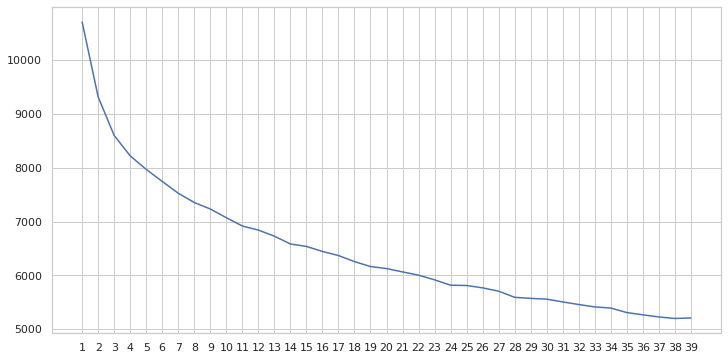

In [67]:
plt.plot(range(1,40),inertias)
plt.xticks(range(1,40));

In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [70]:
km = KMeans(n_clusters=13)
km.fit(perretessinnombre)

KMeans(n_clusters=13)

In [71]:
y_pred = km.predict(perretessinnombre)

In [72]:
perretessinnombre["predict"] = y_pred

In [73]:
perretessinnombre["predict"].unique() 

array([ 6,  9,  5,  0,  8, 10, 11,  3, 12,  1,  7,  4,  2], dtype=int32)

In [74]:
perretessinpredict= perretessinnombre.drop("predict", axis=1)

In [75]:
silhouette_score(perretessinpredict, y_pred)

0.062260611129719715

In [76]:
#scalar y volver a probar

In [77]:
dat_ = perretessinpredict.copy()

# Escalamos datos

In [78]:
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(dat_), columns=dat_.columns)

In [79]:
kmeans = [KMeans(n_clusters=i) for i in range(1,21)]
for model in kmeans:
    model.fit(dat_)

In [80]:
inertias = [model.inertia_ for model in kmeans]
inertias[:3]

[10701.133858267718, 9311.162829965666, 8596.568176328503]

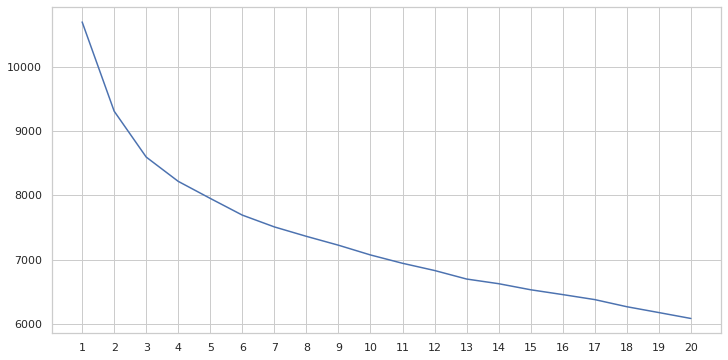

In [81]:
plt.plot(range(1,21),inertias)
plt.xticks(range(1,21));

In [82]:

kmestandar = KMeans(n_clusters=6)
kmestandar.fit(dat_)

KMeans(n_clusters=6)

In [83]:
y_yanose = kmestandar.predict(dat_)

### Silueta datos estandarizados

In [84]:
silhouette_score(dat_, y_yanose)

0.07350295688641874

# PCA DE 2

In [85]:
pecea2 = perretessinpredict.copy()

In [86]:
pca = PCA(2)
pecea_t2 = pd.DataFrame(pca.fit_transform(pecea2), columns=["PC1", "PC2"] )

In [87]:
km2 = KMeans(n_clusters=6)
km2.fit(pecea_t2)

KMeans(n_clusters=6)

In [88]:
y_pece = km2.predict(pecea_t2)

In [89]:
# Silueta datos PCA de 2

In [90]:
silhouette_score(pecea_t2, y_pece)

0.35918477172186514

In [91]:
pecea_t2["grupetes"] = y_pece

/home/mariadelas/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


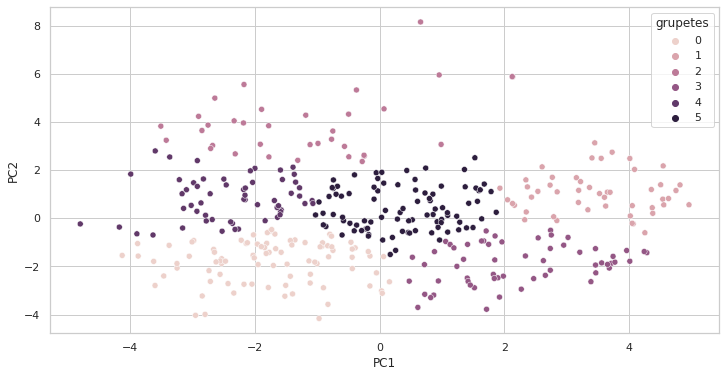

In [92]:
pca_perros2 = sns.scatterplot(pecea_t2["PC1"],pecea_t2["PC2"], hue=pecea_t2["grupetes"]);

In [93]:
pecea_t2["grupetes"].value_counts()

5    91
0    89
3    59
4    58
1    49
2    35
Name: grupetes, dtype: int64

In [94]:
perretillos["groups"] = y_pece

In [95]:
a = perretillos.groups == 2

In [96]:
columnassinnombre = ['Adapts Well To Apartment Living', 'Good For Novice Owners',
       'Sensitivity Level', 'Tolerates Being Alone', 'Tolerates Cold Weather',
       'Tolerates Hot Weather', 'Affectionate With Family', 'Kid-Friendly',
       'Dog Friendly', 'Friendly Toward Strangers', 'Amount Of Shedding',
       'Drooling Potential', 'Easy To Groom', 'General Health',
       'Potential For Weight Gain', 'Size', 'Easy To Train', 'Intelligence',
       'Potential For Mouthiness', 'Prey Drive', 'Tendency To Bark Or Howl',
       'Wanderlust Potential', 'Energy Level', 'Intensity', 'Exercise Needs',
       'Potential For Playfulness', 'grupetes']

In [97]:
len(columnassinnombre)

27

In [98]:
#Agrupar por columnas

In [99]:
perretillos.head(1)

,Name,Adapts Well To Apartment Living,Good For Novice Owners,Sensitivity Level,Tolerates Being Alone,Tolerates Cold Weather,Tolerates Hot Weather,Affectionate With Family,Kid-Friendly,Dog Friendly,...,Intelligence,Potential For Mouthiness,Prey Drive,Tendency To Bark Or Howl,Wanderlust Potential,Energy Level,Intensity,Exercise Needs,Potential For Playfulness,groups
0,Afador,1,1,3,3,4,2,4,2,3,...,5,4,4,4,4,4,4,4,3,2


In [100]:
perretillos["Adaptation"]= round(perretillos[['Adapts Well To Apartment Living', 'Good For Novice Owners','Sensitivity Level', 'Tolerates Being Alone', 'Tolerates Cold Weather', 'Tolerates Hot Weather']].mean(axis=1),0)

In [101]:
perretillos["Afecttion"]= round(perretillos[['Affectionate With Family', 'Kid-Friendly','Dog Friendly', 'Friendly Toward Strangers']].mean(axis=1),0)

In [103]:
 perretillos["Health & Gruming"]= round(perretillos[['Amount Of Shedding', 'Drooling Potential', 'Easy To Groom', 'General Health',
'Potential For Weight Gain', 'Size']].mean(axis=1),0)

In [105]:
perretillos["Trainability"]= round(perretillos[['Easy To Train', 'Intelligence',
       'Potential For Mouthiness', 'Prey Drive', 'Tendency To Bark Or Howl',
       'Wanderlust Potential']].mean(axis=1),0)

In [107]:
perretillos["Physical Needs"]= round(perretillos[['Energy Level', 'Intensity', 'Exercise Needs',
       'Potential For Playfulness']].mean(axis=1),0)

In [108]:
perretillos

,Name,Adapts Well To Apartment Living,Good For Novice Owners,Sensitivity Level,Tolerates Being Alone,Tolerates Cold Weather,Tolerates Hot Weather,Affectionate With Family,Kid-Friendly,Dog Friendly,...,Energy Level,Intensity,Exercise Needs,Potential For Playfulness,groups,Adaptation,Afecttion,Health & Gruming,Trainability,Physical Needs
0,Afador,1,1,3,3,4,2,4,2,3,...,4,4,4,3,2,2.0,2.0,3.0,4.0,4.0
1,Affenhuahua,4,4,4,1,2,3,4,3,2,...,4,3,3,3,1,3.0,3.0,3.0,3.0,3.0
2,Affenpinscher,5,4,3,1,3,3,5,1,4,...,4,3,3,4,1,3.0,3.0,2.0,3.0,4.0
3,Afghan Hound,5,3,5,2,5,5,5,5,4,...,5,2,4,4,5,4.0,4.0,2.0,3.0,4.0
4,Akbash,1,2,3,4,4,2,5,4,3,...,2,2,2,3,2,3.0,4.0,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,Wirehaired Pointing Griffon,1,3,4,1,4,3,5,5,4,...,5,3,4,5,0,3.0,5.0,2.0,4.0,4.0
377,Xoloitzcuintli,5,1,5,1,3,3,5,3,2,...,3,3,3,3,5,3.0,3.0,3.0,4.0,3.0
378,Yakutian Laika,1,3,3,1,5,3,5,4,4,...,4,3,5,4,0,3.0,4.0,3.0,3.0,4.0
379,Yorkipoo,5,5,4,3,2,3,5,4,3,...,5,3,3,4,1,4.0,4.0,2.0,4.0,4.0


In [250]:
perretillos.columns


Index(['Name', 'Adapts Well To Apartment Living', 'Good For Novice Owners',
       'Sensitivity Level', 'Tolerates Being Alone', 'Tolerates Cold Weather',
       'Tolerates Hot Weather', 'Affectionate With Family', 'Kid-Friendly',
       'Dog Friendly', 'Friendly Toward Strangers', 'Amount Of Shedding',
       'Drooling Potential', 'Easy To Groom', 'General Health',
       'Potential For Weight Gain', 'Size', 'Easy To Train', 'Intelligence',
       'Potential For Mouthiness', 'Prey Drive', 'Tendency To Bark Or Howl',
       'Wanderlust Potential', 'Energy Level', 'Intensity', 'Exercise Needs',
       'Potential For Playfulness', 'groups', 'Adaptation', 'Afecttion',
       'Health & Gruming', 'Trainability', 'Physical Needs'],
      dtype='object')

In [ ]:
#mirar en los clusters caract fisicas como frio calor y size  Drooling Potential***** Amount Of Shedding**Easy To Groom**General Health,  Potential For Weight Gain

In [119]:
#Gráficps

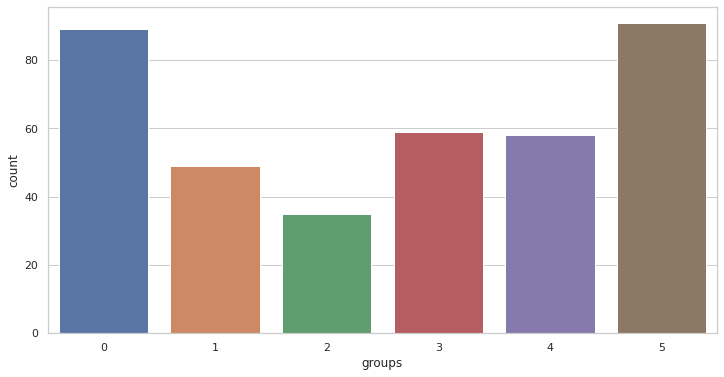

In [110]:
sns.countplot(x=perretillos.groups);

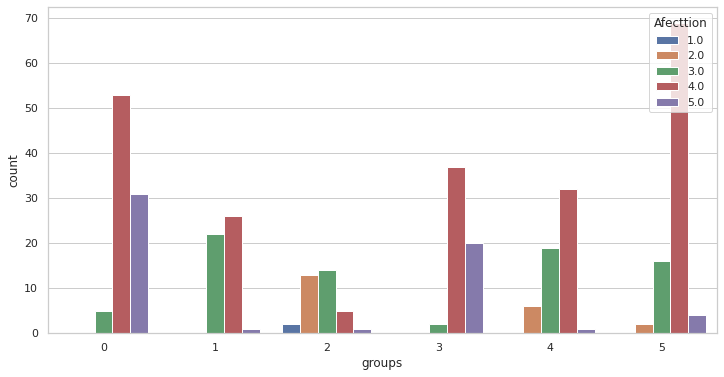

In [113]:
sns.countplot(x="groups", hue="Afecttion", data = perretillos);

In [118]:
# Los grupos más amorosos son  el 0 el 3 y el 5. El más despegado es el 2

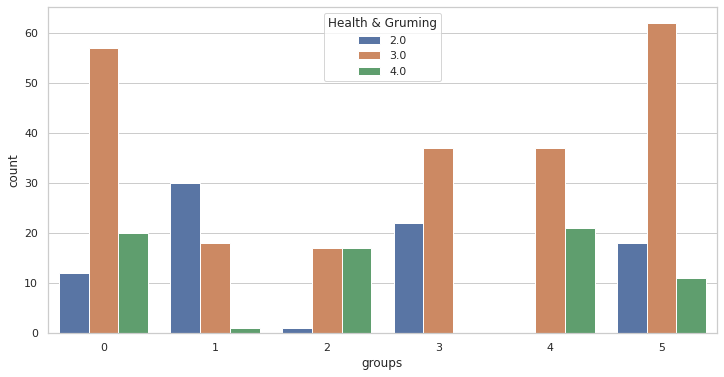

In [114]:
sns.countplot(x="groups", hue="Health & Gruming", data = perretillos);

In [117]:
#La variable de salud tiene puntuaciones poco dispersas. El grupo, es el más resistente es el 1

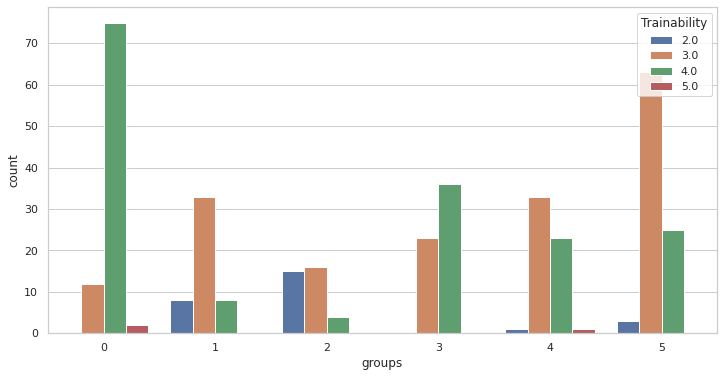

In [115]:
sns.countplot(x="groups", hue="Trainability", data = perretillos);

In [ ]:
#El grupo 0 es el más entrenable

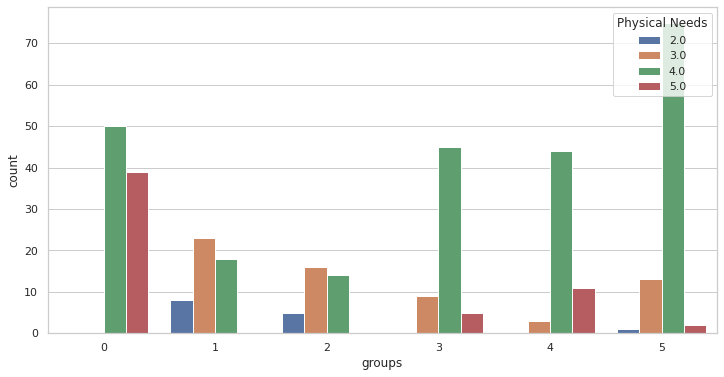

In [116]:
sns.countplot(x="groups", hue="Physical Needs", data = perretillos);

In [121]:
#El grupo 0 tiene claramente más necesidades físicas

In [120]:
#Resumen:
    # Los grupos más amorosos son  el 0 el 3 y el 5. El más despegado es el 2
    #La variable de salud tiene puntuaciones poco dispersas. El grupo, es el más resistente es el 1
    #El grupo 0 es el más entrenable
    #El grupo 0 tiene claramente más necesidades físicas

# vamos a analizar más los grupetes

In [122]:
perretillos.groupby(['groups'])["Adapts Well To Apartment Living"].mean()

groups
0    1.876404
1    4.693878
2    2.285714
3    4.610169
4    1.534483
5    3.296703
Name: Adapts Well To Apartment Living, dtype: float64

In [129]:
perretillos_0 = perretillos.loc[(perretillos.groups == 0)]
perretillos_1 = perretillos.loc[(perretillos.groups == 1)]
perretillos_2 = perretillos.loc[(perretillos.groups == 2)]
perretillos_3 = perretillos.loc[(perretillos.groups == 3)]
perretillos_4 = perretillos.loc[(perretillos.groups == 4)]
perretillos_5 = perretillos.loc[(perretillos.groups == 5)]

In [140]:
resumen = perretillos.columns[28:]

In [195]:
resumen

Index(['Adaptation', 'Afecttion', 'Health & Gruming', 'Trainability',
       'Physical Needs'],
      dtype='object')

In [233]:
perretillos_0_analisis = [ round(perretillos_0[columnassinnombre[0]].mean(),1), round(perretillos_0[columnassinnombre[1]].mean(),1), round(perretillos_0[columnassinnombre[2]].mean(),1), round(perretillos_0[columnassinnombre[3]].mean(),1), round(perretillos_0[columnassinnombre[4]].mean(),1)]

In [197]:
perretillos_1_analisis = [ round(perretillos_1[columnassinnombre[0]].mean(),1), round(perretillos_1[columnassinnombre[1]].mean(),1), round(perretillos_1[columnassinnombre[2]].mean(),1), round(perretillos_1[columnassinnombre[3]].mean(),1), round(perretillos_1[columnassinnombre[4]].mean(),1)]

In [198]:
perretillos_2_analisis = [ round(perretillos_2[columnassinnombre[0]].mean(),1), round(perretillos_2[columnassinnombre[1]].mean(),1), round(perretillos_2[columnassinnombre[2]].mean(),1), round(perretillos_2[columnassinnombre[3]].mean(),1), round(perretillos_2[columnassinnombre[4]].mean(),1)]

In [199]:
perretillos_3_analisis = [ round(perretillos_3[columnassinnombre[0]].mean(),1), round(perretillos_3[columnassinnombre[1]].mean(),1), round(perretillos_3[columnassinnombre[2]].mean(),1), round(perretillos_3[columnassinnombre[3]].mean(),1), round(perretillos_3[columnassinnombre[4]].mean(),1)]

In [200]:
perretillos_4_analisis = [ round(perretillos_4[columnassinnombre[0]].mean(),1), round(perretillos_4[columnassinnombre[1]].mean(),1), round(perretillos_4[columnassinnombre[2]].mean(),1), round(perretillos_4[columnassinnombre[3]].mean(),1), round(perretillos_4[columnassinnombre[4]].mean(),1)]

In [201]:
perretillos_5_analisis = [ round(perretillos_5[columnassinnombre[0]].mean(),1), round(perretillos_5[columnassinnombre[1]].mean(),1), round(perretillos_5[columnassinnombre[2]].mean(),1), round(perretillos_5[columnassinnombre[3]].mean(),1), round(perretillos_5[columnassinnombre[4]].mean(),1)]

In [202]:
perretillos_0_analisis

[1.9, 2.5, 3.9, 1.9, 3.6]

In [206]:
resumen_grupos = pd.DataFrame(perretillos_0_analisis, resumen)

In [209]:
resumen_grupos["1"]= (perretillos_1_analisis)

In [210]:
resumen_grupos["2"]= (perretillos_2_analisis)
resumen_grupos["3"]= (perretillos_3_analisis)
resumen_grupos["4"]= (perretillos_4_analisis)
resumen_grupos["5"]= (perretillos_5_analisis)


In [211]:
resumen_grupos

,0,1,2,3,4,5
Adaptation,1.9,4.7,2.3,4.6,1.5,3.3
Afecttion,2.5,4.0,1.6,4.0,1.8,2.8
Health & Gruming,3.9,3.7,3.1,4.1,3.4,3.6
Trainability,1.9,2.1,2.6,1.7,2.0,2.3
Physical Needs,3.6,2.3,3.9,2.7,3.8,3.4


In [239]:
lista_0 = []
for x in perretillos_0_analisis:
    if x<3:
        lista_0.append("bajo")
    elif x >= 3 and x < 4:
        lista_0.append("medio")
    else:
        lista_0.append("alto")

In [241]:
lista_1 = []
for x in perretillos_1_analisis:
    if x<3:
        lista_1.append("bajo")
    elif x >= 3 and x < 4:
        lista_1.append("medio")
    else:
        lista_1.append("alto")

In [242]:
lista_2 = []
for x in perretillos_2_analisis:
    if x<3:
        lista_2.append("bajo")
    elif x >= 3 and x < 4:
        lista_2.append("medio")
    else:
        lista_2.append("alto")

In [243]:
lista_3 = []
for x in perretillos_3_analisis:
    if x<3:
        lista_3.append("bajo")
    elif x >= 3 and x < 4:
        lista_3.append("medio")
    else:
        lista_3.append("alto")

In [244]:
lista_4 = []
for x in perretillos_4_analisis:
    if x<3:
        lista_4.append("bajo")
    elif x >= 3 and x < 4:
        lista_4.append("medio")
    else:
        lista_4.append("alto")

In [245]:
lista_5 = []
for x in perretillos_5_analisis:
    if x<3:
        lista_5.append("bajo")
    elif x >= 3 and x < 4:
        lista_5.append("medio")
    else:
        lista_5.append("alto")

In [246]:
resumen_cualit = pd.DataFrame(lista_0, resumen)

In [247]:
resumen_cualit

,0
Adaptation,bajo
Afecttion,bajo
Health & Gruming,medio
Trainability,bajo
Physical Needs,medio


In [248]:
resumen_cualit["1"]= (lista_1)
resumen_cualit["2"]= (lista_2)
resumen_cualit["3"]= (lista_3)
resumen_cualit["4"]= (lista_4)
resumen_cualit["5"]= (lista_5)

In [249]:
resumen_cualit

,0,1,2,3,4,5
Adaptation,bajo,alto,bajo,alto,bajo,medio
Afecttion,bajo,alto,bajo,alto,bajo,bajo
Health & Gruming,medio,medio,medio,alto,medio,medio
Trainability,bajo,bajo,bajo,bajo,bajo,bajo
Physical Needs,medio,bajo,medio,bajo,medio,medio
